In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as tfk

### **1. Introduction about training a neural network model to implement image classification task on CIFAR 10 dataset[20pts]**

**1.1 Getting CIFAR10 dataset from tensorflow datasets**

Actually there are 60000 data samples for the whole dataset. We only use 20000 samples for this assignment by randomly sampling. 

In [ ]:
# get cifar10 dataset
# dataset_images: 50000 x 32 x 32 x 3
# dataset_labels: 50000
(dataset_images, dataset_labels),_ = tfk.datasets.cifar10.load_data()
#preprocessing: normalize for the image data
dataset_images=dataset_images /255.0
data_indices=np.arange(0, len(dataset_images))
np.random.shuffle(data_indices)
dataset_images=dataset_images[data_indices][:20000]
dataset_labels=dataset_labels[data_indices][:20000]
print("image_size:", dataset_images.shape)
print("label_size:", dataset_labels.shape)

170500096/170498071 [==============================] - 4s 0us/step
image_size: (20000, 32, 32, 3)
label_size: (20000, 1)


**1.2 Splitting the dataset into train dataset and test dataset[20pts]**

For given a dataset, we would like to randomly split the dataset to train dataset and test dataset as the ratio(train_size/test_size)

In [ ]:
#### output of the function should be#######
#1. train_images: the images data in the training set
#2. train_labels: the class labels data in the training set
#3. test_images: the images data in the test set
#4. test_labesl: the labels data in the test set
def train_test_split(dataset_images, dataset_labels, ratio):
    pivot = (int)(len(dataset_images) * ratio)
    
    data_indices=np.arange(0, len(dataset_images))
    np.random.shuffle(data_indices)
    dataset_images=dataset_images[data_indices]
    dataset_labels=dataset_labels[data_indices]

    train_images = dataset_images[:pivot]
    train_labels = dataset_labels[:pivot]
    test_images = dataset_images[pivot:]
    test_labels = dataset_labels[pivot:]

    return train_images, train_labels, test_images, test_labels

In [ ]:
# split the given dataset into train dataset and test dataset with ratio=0.5
ori_train_images, ori_train_labels, ori_test_images, ori_test_labels=train_test_split(dataset_images, dataset_labels,0.5)
print("ori_train_images_size:" ,ori_train_images.shape)
print("ori_train_labels_size:" ,ori_train_labels.shape)
print("ori_test_images_size:" ,ori_test_images.shape)
print("ori_test_labels_size:" ,ori_test_labels.shape)

ori_train_images_size: (10000, 32, 32, 3)
ori_train_labels_size: (10000, 1)
ori_test_images_size: (10000, 32, 32, 3)
ori_test_labels_size: (10000, 1)


**1.3 Define and train a classifier model for the CIFAR10 image classification task.**

We could like to use a simple Convolutional Neutral Network model as defined below

In [ ]:
# define the classifier network
pre_train_model = tfk.Sequential([
    tfk.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tfk.layers.MaxPooling2D((2, 2)),
    tfk.layers.Conv2D(64, (3, 3), activation='relu'),
    tfk.layers.MaxPooling2D((2, 2)),
    tfk.layers.Flatten(),
    tfk.layers.Dense(128, activation='relu'),
    tfk.layers.Dense(10),
    tfk.layers.Softmax()
])
pre_train_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Compile and Train the defined Covolution Neutral Network model

In [ ]:
pre_train_model.compile(optimizer='adam', loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics=['accuracy'])
pre_train_model.fit(ori_train_images, ori_train_labels, epochs=30)

Epoch 1/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7470 - accuracy: 0.3621
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 1.4039 - accuracy: 0.5007
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 1.2526 - accuracy: 0.5539
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 1.1146 - accuracy: 0.6107
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 1.0028 - accuracy: 0.6478
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 0.9060 - accuracy: 0.6805
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 0.8115 - accuracy: 0.7156
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 0.7183 - accuracy: 0.7499
Epoch 9/30
313/313 [==============================] - 1s 3ms/step - loss: 0.6307 - accuracy: 0.7747
Epoch 10/30
313/313 [==============================] - 1s 3ms/step - loss: 0.5524 - accuracy: 0.8116

Evaluate the accutracy of the model on the test dataset

Given a specified data sample, using the pre trained model to predict the classification of the data sample

In [ ]:
###after finish training the model, you can use it to predict the classification for a given image #######
data_image=ori_test_images[50,:]
data_label=ori_test_labels[50]
data_image=np.expand_dims(data_image, axis=0)
###get the predict probility####
data_prediction=pre_train_model.predict(data_image)[0]
print("predict probility：",data_prediction)
print("predict label: ", np.argmax(data_prediction))
print("true label: ", data_label)


predict probility： [2.4317544e-02 2.9521013e-04 9.6666312e-01 6.8199117e-09 8.6808437e-03
 1.6966489e-09 4.5382995e-07 1.3584294e-12 9.9927931e-08 4.2784082e-05]
predict label:  2
true label:  [2]


Evaluate the predict accuracy of the pre train model on the test dataset

In [ ]:
_, test_acc = pre_train_model.evaluate(ori_test_images, ori_test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 3.1786 - accuracy: 0.5766
Test accuracy: 0.5766000151634216


# **2. Introduction about Membership Inference Attack**
Generally, for a pre-trained model,we could not know the information about the train dataset,which is sensitive data. For example, for the model provided by Google, Amazon, etc, we just use the API for our own task. In this case, for given a data sample, we could not know whether it belongs to the train dataset of the pre-trained model.

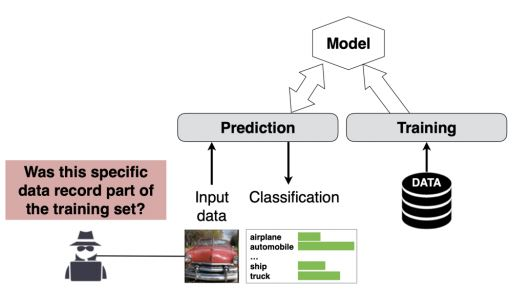

In this assignment, we get the pre-trained CNN model for CIFAR10. But, the original train dataset is unknown in the real case.

For Membership Inference Attack, we would like use some tricky methods to attack the pre-trained model to access the information whether a specific data sample belongs to the train dataset of a pre-trained model.

Here we would like to use another neutral network named memory attack model to solve this problem.

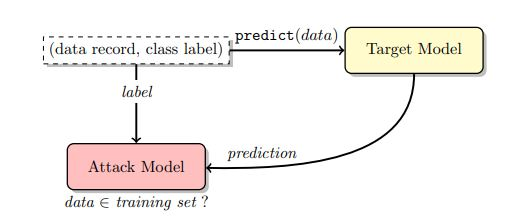

The basic idea is that we would like use another Attack Model. As the figure above shown, for a given specific data, we feed the data to the Target Model to get the probility prediction. Then we use the probability prediction as the feature vector and the data class label as the input to feed into the Attack Model. Finally, the Attack Model will output the probability about wheter this given data belongs to the train dataset of the Target Model

**2.1 Define Membership Attack Model Neutral Network**

We would like to use a simple dense neutral network as the attack model. The input of the attack model is the 10-dimensional probability output from the pre-trained model for the data sample and the class label of the data sample. The output for the attack model is the probility of this data sample belongs to the train dataset

In [ ]:
feature_vector_from_model_output=tfk.Input(shape=[10]) # feature vector represents 10-dimension probability outputs from the pre-trained model
labels = tfk.Input(shape=[1]) # label represents the data sample label
x = tfk.layers.Concatenate()([feature_vector_from_model_output, labels])
x = tfk.layers.Dense(64, activation='relu')(x)
outputs = tfk.layers.Dense(1, activation='sigmoid')(x)
membership_attack_model = tfk.Model(inputs=[feature_vector_from_model_output, labels], outputs=outputs)
membership_attack_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 11)           0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           768         concatenate[0][0]     

Compile the membership attack model

In [ ]:
membership_attack_model.compile(optimizer='adam', loss=tfk.losses.BinaryCrossentropy(from_logits=False),
                            metrics=['accuracy'])

**The question is how could we train this attack model. Since we do not know the train dataset for the pre-trained model in the real case, thus we could not generate the dataset to train the attack model.** 


# **3. Train the Attack Model[60pts]**

In the real case, we could only obtain the model structure  of the Target Model. Here we use the pre train model as the Target Model. Assume we could obtain some unsensitive images data or we could synthesis some images data, which has the same distribution with sensitive train dataset. We define these unsensitive dataset as the known dataset.


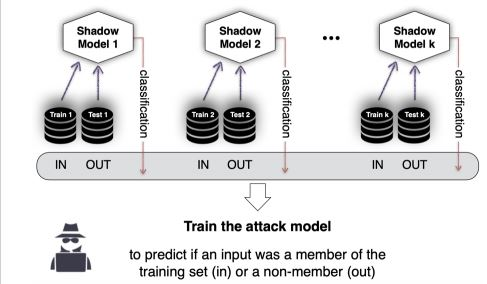

The idea of train the Attack Model is that we would like to define a buntch of new neural network, named Shadow Model. Shadow Model has the same model structure with the Target Model, which we have already known. We would like split the known dataset we obtained to train and test dataset to train the Shadow Model. Since we know the train dataset and test dataset for the Shadow model, we could use these datasets to form a new dataset to train the Attack Model.   

The new dataset to train the Attack Model should includes three kinds of information. To be specific, for a given data, it should include Shadow Model probability prediction of this data,  class label and whether this data in/out the train dataset of Shadow Model. 

**3.1 Generate the known image dataset**

These known image dataset should have the same data distribution characteristic with the train dataset of pre-trained model.
To be simplified, in this assignemnt, we could just use the original test dataset as the known image dataset, since it is disjoint with the original train dataset but has the same distribution. 

In [ ]:
known_dataset_images=ori_test_images
known_dataset_labels=ori_test_labels
print("generated disjoint image dataset:", known_dataset_images.shape)

generated disjoint image dataset: (10000, 32, 32, 3)


**3.2 Define a new CNN shadow model[10pts]**

As the description above, the shadow should has use the same model structure of the pre train model as intialization. To be simplicity, in this assignment, we only need to use one shadow model.


In [ ]:
shadow_model = tfk.Sequential([
    tfk.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tfk.layers.MaxPooling2D((2, 2)),
    tfk.layers.Conv2D(64, (3, 3), activation='relu'),
    tfk.layers.MaxPooling2D((2, 2)),
    tfk.layers.Flatten(),
    tfk.layers.Dense(128, activation='relu'),
    tfk.layers.Dense(10),
    tfk.layers.Softmax()
])
shadow_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

**3.3 Train the Shadow model[10pts]**

We use the known image dataset obtained before to train the shadow model.

In [ ]:
# get the train dataset and test dataset for the shadow model using the known image dataset
# we could use the train_test_split_function defined as before with ration=0.5
shadow_train_images, shadow_train_labels, shadow_test_images, shadow_test_labels=train_test_split(known_dataset_images, known_dataset_labels,0.5)
print("shadow_train_images_size:" ,shadow_train_images.shape)
print("shadow_train_labels_size:" ,shadow_train_labels.shape)
print("shadow_test_images_size:" ,shadow_test_images.shape)
print("shadow_test_labels_size:" ,shadow_test_labels.shape)

shadow_train_images_size: (5000, 32, 32, 3)
shadow_train_labels_size: (5000, 1)
shadow_test_images_size: (5000, 32, 32, 3)
shadow_test_labels_size: (5000, 1)


In [ ]:
# Complie and Train the shallow model
shadow_model.compile(optimizer='adam', loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=False),
                            metrics=['accuracy'])
shadow_model.fit(shadow_train_images, shadow_train_labels, epochs=30)


Epoch 1/30
157/157 [==============================] - 1s 3ms/step - loss: 1.9666 - accuracy: 0.2688
Epoch 2/30
157/157 [==============================] - 0s 3ms/step - loss: 1.6038 - accuracy: 0.4176
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 1.4242 - accuracy: 0.4790
Epoch 4/30
157/157 [==============================] - 0s 3ms/step - loss: 1.3201 - accuracy: 0.5314
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 1.2007 - accuracy: 0.5708
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 1.0892 - accuracy: 0.6140
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.9912 - accuracy: 0.6562
Epoch 8/30
157/157 [==============================] - 0s 3ms/step - loss: 0.9123 - accuracy: 0.6806
Epoch 9/30
157/157 [==============================] - 0s 3ms/step - loss: 0.8006 - accuracy: 0.7224
Epoch 10/30
157/157 [==============================] - 0s 3ms/step - loss: 0.7329 - accuracy: 0.7486

**3.4 Generate the new dataset for training the membership attack model[20pts]**



In [ ]:
# generate data set for memory attack model
# we shoud generate the In dataset and Out dataset sequetially and then concantate the In dataset and Out dataset by Random Shuffle.
## output of the function#######
# 1.dataset_fvs(feature vectors) represents the probability output of the model
# 2.dataset_labels represent the class label
# 3.dataset_targets represent whether the data in/out the train dataset of the model (in->1  out->0)
def generate_attack_dataset(model, train_images, train_labels, test_images, test_labels):
  ################Generate the In dataset########### 
  in_data=model.predict(train_images)
  in_labels=train_labels
  in_targets=np.ones(len(in_data))

  ################Generate the Out dataset############
  out_data=model.predict(test_images)
  out_labels=test_labels
  out_targets=np.zeros(len(out_data))

  ###############Concatenate the In dataset and Out dataset by Random Shuffle############
  cons_data = np.concatenate([in_data,out_data])
  cons_labels = np.concatenate([in_labels,out_labels])
  cons_targets = np.concatenate([in_targets,out_targets])
  
  data_indices=np.arange(0, len(cons_data))
  np.random.shuffle(data_indices)
  
  dataset_fvs=cons_data[data_indices]
  dataset_labels=cons_labels[data_indices]
  dataset_targets=cons_targets[data_indices]

  return dataset_fvs, dataset_labels, dataset_targets


In [ ]:
# generate the train dataset for the attack model
attack_train_fvs, attack_train_labels, attack_train_targets=generate_attack_dataset(shadow_model, shadow_train_images, shadow_train_labels, shadow_test_images, shadow_test_labels)
print("attack_train_fvs_size:", attack_train_fvs.shape)
print("attack_train_labels_size",attack_train_labels.shape)
print("attack_train_targets_size", attack_train_targets.shape)

attack_train_fvs_size: (10000, 10)
attack_train_labels_size (10000, 1)
attack_train_targets_size (10000,)


**3.5 Evaluate the attack performance before training the model[10pts]**

To make comparision, before training the attack model, you could firstly evaluate the attack performance.

To evaluate the performance, you could directly jump to the Section 4 to run the code and get the evaluate accuracy and write the accuracy in the textbox below. The evaluate accuracy without training should be around 0.5 and explain why?


**Evaluate Accuracy without training the attack model:** 0.46000000834465027

**Reason:** The attack model evaluates whether or not a specific value is in the test set. When the model is not trained, it is essentially flipping a coin randomly to determine whether or not an input is within the test set, giving us around a .5 accuracy. 

**3.5 Train the attack model[10pts]**

In [ ]:
#train the attack model using the generated attack train dataset
membership_attack_model.fit([attack_train_fvs, attack_train_labels], attack_train_targets, epochs=30)

Epoch 1/30
313/313 [==============================] - 1s 2ms/step - loss: 0.6830 - accuracy: 0.5575
Epoch 2/30
313/313 [==============================] - 1s 2ms/step - loss: 0.6459 - accuracy: 0.6457
Epoch 3/30
313/313 [==============================] - 1s 2ms/step - loss: 0.6040 - accuracy: 0.6886
Epoch 4/30
313/313 [==============================] - 1s 2ms/step - loss: 0.5720 - accuracy: 0.7230
Epoch 5/30
313/313 [==============================] - 1s 2ms/step - loss: 0.5489 - accuracy: 0.7490
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 0.5300 - accuracy: 0.7536
Epoch 7/30
313/313 [==============================] - 1s 2ms/step - loss: 0.5155 - accuracy: 0.7623
Epoch 8/30
313/313 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.7654
Epoch 9/30
313/313 [==============================] - 1s 2ms/step - loss: 0.4948 - accuracy: 0.7682
Epoch 10/30
313/313 [==============================] - 1s 2ms/step - loss: 0.4870 - accuracy: 0.7732

#**4.Evaluate the attack performance of the membership attack model on the pre-trained model**




**4.1 Generate Evaluation dataset**

We randomly extract 2000 images from original dataset to form the evaluation dataset: 1000 from the orginial train dataset, 1000 from the original test dataset.



In [ ]:
eval_train_images, eval_train_labels,_,_=train_test_split(ori_train_images,ori_train_labels, 0.1)
eval_test_images, eval_test_labels,_,_=train_test_split(ori_test_images,ori_test_labels, 0.1)

print("evaluate_train_images_size:", eval_train_images.shape)
print("evaluate_train_labels_size:", eval_train_labels.shape)
print("evaluate_test_images_size:", eval_test_images.shape)
print("evaluate_test_labels_size:", eval_test_labels.shape)


evaluate_train_images_size: (1000, 32, 32, 3)
evaluate_train_labels_size: (1000, 1)
evaluate_test_images_size: (1000, 32, 32, 3)
evaluate_test_labels_size: (1000, 1)


4.2 Generate the Evaluation dataset for Attack Model

In [ ]:
attack_eval_fvs, attack_eval_labels, attack_eval_targets=generate_attack_dataset(pre_train_model, eval_train_images, eval_train_labels, eval_test_images, eval_test_labels)
print("attack_eval_fvs_size:", attack_eval_fvs.shape)
print("attack_eval_labels_size",attack_eval_labels.shape)
print("attack_eval_targets_size", attack_eval_targets.shape)

attack_eval_fvs_size: (2000, 10)
attack_eval_labels_size (2000, 1)
attack_eval_targets_size (2000,)


In [ ]:
_, attack_acc = membership_attack_model.evaluate((attack_eval_fvs, attack_eval_labels), attack_eval_targets, verbose=2)
print('Test accuracy: ', attack_acc)

63/63 - 0s - loss: 0.5742 - accuracy: 0.7285
Test accuracy:  0.7285000085830688


# **5. Explanation[20pts]**

After finish this assignment, you should have a deep understanding about membership inference attack. Please have a explanation about 

1. why the attack model could successfully detect the In/Out information.
Hint: observe the difference train accuracy and test accuracy of the target model. what the difference come from and what the attack model trying to detect. 

2. Why the attack model trained on Shadow model could successfully attack the Target Model.
Hint: observe the model structure and the characteristic data feed into the shadow model


1. The trained attack model was able to detect whether or not a image belonged to the training set with an accuracy of .790. This is a large improvement from the pre-trained accuracy of .460. This was possible because the target model was overfit to the images in the training set and did not generalize well to non-training set images. The accuracy for the training set images was 0.9904, which was observed in the 'Compile and Train' step of the target model. However, after evaluating the model using the images in the testing set, the accuracy was only 0.5766, indicating the model did not generalize well. Because there was overfitting, the attack model was able to easily identify whether or not an image belonged to the training set by looking at the confidence intervals produced by the shadow model. When the confidence interval shows a strong bias towards the correct classification, it can indicate that it was in the overfit training set.

2. The attack model trained on the shadow model could successfully attack the target model because the shadow model had the same structure and parameters as the target model and was trained using similar data. Using the confidence levels and labels of the shadow model, the attack model learned the differences in confidence between in and out samples, and then was able to successfully infer if a given image was in the training set. 